In [13]:
# generate random integer values
from random import seed
from random import randint
from random import random
import matplotlib.pyplot as plt
import numpy as np
import math
import copy

class EA_imp():  
  def __init__(self, genes, population_size, offspring_size, generations, mutation_rate, iterations, parent_ss, survivor_ss, max_min):
    self.population_size = population_size
    self.offspring_size = offspring_size
    self.generations = generations
    self.mutation_rate = mutation_rate
    self.iterations = iterations
    self.BSF_table = [[0 for i in range(iterations + 1)] for i in range(generations)]
    self.ASF_table = [[0 for i in range(iterations + 1)] for i in range(generations)]
    self.population = []
    self.parent_ss = parent_ss
    self.survivor_ss = survivor_ss
    self.gen_num = 0
    self.iter_num = 0
    self.max_min = max_min
    self.genes = genes
    #missing parent and child ss selection

  def generate_gen1(self):
    self.population = []
    for i in range(self.population_size):
      individual = self.generate_individual() #individual = ([list of gene numbers], fitness)
      fitness = self.fitness_function(individual) #calculate fitness of individual
      self.population.append((individual, fitness))
  
  def check_repetition(self, chromosome, gene):
    #is different for all
    pass

  def generate_individual(self):
    #is different for all
    pass

  def fitness_function(self, chromosome):
    #is different for all
    pass

  def parent_selection(self):
    #sort the population from highest fitness to lowest fitness
    ranked_arrangement, total_rank = self.insertionSort(self.population)
    #select two parents according to chosen selection scheme
    for i in range(int(self.offspring_size/2)):
      if self.parent_ss == "FPS":
        parent_1 = self.FPS(ranked_arrangement)
        parent_2 = self.FPS(ranked_arrangement)
      elif self.parent_ss == "RBS":
        parent_1 = self.RBS(ranked_arrangement, total_rank)
        parent_2 = self.RBS(ranked_arrangement, total_rank)
      elif self.parent_ss == "BT":
        parent_1 = self.BT()
        parent_2 = self.BT()
      elif self.parent_ss == "Truncation":
        parent_1 = self.Truncation(self.offspring_size/2, ranked_arrangement)
        parent_2 = self.Truncation(self.offspring_size/2, ranked_arrangement)
      else:
        parent_1 = self.Random()
        parent_2 = self.Random()
      #perform cross-over operation on chosen parents to produce offspring
      offspring1, offspring2 = self.crossover_operator_order2(parent_1[0], parent_2[0])
      #perform mutation operation on the offspring
      offspring1 = self.mutation_operator(offspring1)
      offspring2 = self.mutation_operator(offspring2)
      #calculate fitness of the offspring
      fitness1 = self.fitness_function(offspring1)
      fitness2 = self.fitness_function(offspring2)
      #add offspring to the population
      self.population.append((offspring1, fitness1))
      self.population.append((offspring2, fitness2))
  
  def survivor_selection(self):
    new_population = []
    #sort the population from highest fitness to lowest fitness
    ranked_arrangement, total_rank = self.insertionSort(self.population)
    #select survivors according to chosen selection scheme and add them to the new population
    for i in range(self.population_size):
      if self.survivor_ss == "FPS":
        survivor = self.FPS(ranked_arrangement)
      elif self.survivor_ss == "RBS":
        survivor = self.RBS(ranked_arrangement, total_rank)
      elif self.survivor_ss == "BT":
        survivor = self.BT()
      elif self.survivor_ss == "Truncation":
        survivor = self.Truncation(self.population_size, ranked_arrangement)
      else:
        survivor = self.Random()
      new_population.append(survivor)
    return new_population

  def crossover_operator_order2(self, parent1, parent2):
    seed()
    size = len(self.genes)
    #randomly select two cutoff points which a difference of 40% of the gene size between them
    cutoff1 = randint(0, size-1)
    cutoff2 = randint(0, size-1)
    while abs(cutoff1 - cutoff2) > int(0.4*size):
      cutoff2 = randint(0, size-1)
    #demark the lower (l) cutoff point and higher (h) cutoff point
    l = -1
    h = -1
    if cutoff1 > cutoff2:
      h = cutoff1
      l = cutoff2
    else:
      h = cutoff2
      l = cutoff1
    #initialize two offspring
    offspring1 = [-1]*size
    offspring2 = [-1]*size
    #perform cross over operation where the segment between the cutoff points in
    #offspring1 comes from parent 1 and that outside of the cutoff points comes from
    #parent 2 and vice versa for offspring 2.
    offspring1[l:h] = parent1[l:h]
    offspring2[l:h] = parent2[l:h]
    n = abs(cutoff1 - cutoff2)
    i1 = copy.deepcopy(h)
    i2 = copy.deepcopy(h)
    j1 = copy.deepcopy(h)
    j2 = copy.deepcopy(h)
    while n != size:
      while self.check_repetition(offspring1, parent2[i2]):
        i2 += 1
        if i2 == size:
          i2 = 0
      while self.check_repetition(offspring2, parent1[j2]):
        j2 += 1
        if j2 == size:
          j2 = 0
      offspring1[i1] = parent2[i2]
      offspring2[j1] = parent1[j2]
      i1 += 1
      i2 += 1
      j1 += 1
      j2 += 1
      if i1 == size:
        i1 = 0
      if j1 == size:
        j1 = 0
      if i2 == size:
        i2 = 0
      if j2 == size:
        j2 = 0
      n += 1
    return offspring1, offspring2

  def crossover_operator_order1(self, parent_1, parent_2):
    pass

  def mutation_operator(self, individual):
    seed()
    #choose random integer between 0 to 100
    rand_num = randint(0, 100)
    #if the integer is less than the mutation rate then mutate
    if rand_num <= self.mutation_rate*100:
      #pick two random indexes and swap their values
      pos1 = randint(0, len(individual)-1)
      pos2 = randint(0, len(individual)-1)
      individual[pos1], individual[pos2] = individual[pos2], individual[pos1]
    return individual

  def end_of_gen(self):
    #find the best fitness value in the generation
    # if we need to find local minima then best fitness value is the minimum fitness in the population
    # if we need to find local maxima then best fitness value is the maximum fitness in the population
    avg = 0
    if self.max_min == 'max':
      BSF = -math.inf
      for individual, fitness in self.population:
        if fitness > BSF:
          BSF = fitness
        avg += fitness
    else:
      BSF = math.inf
      for individual, fitness in self.population:
        if fitness < BSF:
          BSF = fitness
        avg += fitness
    ASF = avg/len(self.population)
    #update the BSF and ASF tables with the BSF and ASF value in the current generation
    self.BSF_table[self.gen_num][self.iter_num] = BSF
    self.ASF_table[self.gen_num][self.iter_num] = ASF
    self.gen_num += 1

  def end_of_iter(self):
    #calculate the average BSF value and ASF value for all generations
    #update the average value column in the table with the above value
    for gen in range(self.generations):
      sum_BSF = sum(self.BSF_table[gen])- self.BSF_table[gen][-1]
      sum_ASF = sum(self.ASF_table[gen])- self.ASF_table[gen][-1]
      self.BSF_table[gen][-1] = sum_BSF/(self.iter_num + 1)
      self.ASF_table[gen][-1] = sum_ASF/(self.iter_num + 1)
    self.iter_num += 1
    print(self.iter_num)

  def insertionSort(self, population):
    lst = []
    total_rank = 0
    cur = 0
    for i in population:
      _, rank = i
      j = 0
      inserted = False
      while j < len(lst):
        if rank < lst[j][1]:
          lst.insert(j, i)
          inserted = True
          break
        else:
          j += 1
      if inserted == False:
        lst.append(i)
      cur += 1
      total_rank += cur
    return lst, total_rank

  def FPS(self, ranked_arrangement):
    #generate random number
    seed()
    rand_num = random()
    total_fitness = 0
    if self.max_min == 'max':
      ranked_arrangement = ranked_arrangement[::-1]
    #calculate the total fitness of all chromosomes (individuals) in the population
    for individual, fitness in ranked_arrangement:
      total_fitness += fitness 
    current_cumulation = 0
    for chromosome in ranked_arrangement:
      individual, fitness = chromosome
      #calculate current cumulative fitness
      if self.max_min == 'max':
        current_cumulation += fitness/total_fitness
      else:
        current_cumulation += (1- fitness/total_fitness)/(len(ranked_arrangement) -1)
      #return chromosome if the random number generated is within the current cumulative value
      if rand_num <= current_cumulation:
        return chromosome

  def RBS(self, ranked_arrangement, total_rank):
    seed()
    rand_num = random()
    if self.max_min == 'min':
      ranked_arrangement = ranked_arrangement[::-1]
    current_cumulation = 0
    #calculate current cumulative fitness
    for i in range(len(ranked_arrangement)):
      chromosome = ranked_arrangement[i]
      current_cumulation += (i+1)/total_rank
      #return chromosome if the random number generated is within the current cumulative value
      if rand_num <= current_cumulation:
        return chromosome

  def BT(self):
    #select two random chromosomes from the population
    seed()
    player1 = self.population[randint(0, (self.population_size-1))]
    player2 = self.population[randint(0, (self.population_size-1))]
    #select chromosome with larger fitness value if we need to find local maxima
    #otherwise select chromosome with smaller fitness value
    if self.max_min == 'max':
      if player1[1] > player2[1]:
        return player1
      else:
        return player2
    else:
      if player1[1] > player2[1]:
        return player2
      else:
        return player1

  def Truncation(self, N, ranked_arrangement):
    #choose the top N individuals with best fitness values
    if self.max_min == "min":
      ranked_arrangement = ranked_arrangement[:int(N)]
    else:
      ranked_arrangement = ranked_arrangement[::-1]
      ranked_arrangement = ranked_arrangement[:int(N)]
    #choose random individual from top N individuals
    seed()
    size = len(ranked_arrangement)
    rand_num = randint(0, size-1)
    return ranked_arrangement[rand_num]
        
  def Random(self):
    #select a random individual from the population
    seed()
    size = self.population_size
    rand_num = randint(0, size-1)
    return self.population[rand_num]

  def run_algo(self):
    self.iter_num = 0
    print(self.population)
    while self.iter_num < self.iterations:
      self.generate_gen1()
      self.gen_num = 0
      while self.gen_num < self.generations:
        self.parent_selection()
        self.population = self.survivor_selection()
        self.end_of_gen()
      self.end_of_iter()
    #self.show_result()
    arr_x, arr_y_BSF, arr_y_ASF = self.collect_info()
    self.plot_graph(arr_x, arr_y_BSF, arr_y_ASF)

  def show_result(self):
    print("BSF TABLE")
    for gen_num in range(len(self.BSF_table)):
      print(gen_num+1, ": ", self.BSF_table[gen_num])
    print("\n\n")
    print("*  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *")
    print("\n\n")
    print("ASF TABLE")
    for gen_num in range(len(self.ASF_table)):
      print(gen_num+1, ": ", self.ASF_table[gen_num])

  def collect_info(self):
    arr_x = []
    arr_y_BSF = []
    arr_y_ASF = []
    for gen_num in range(len(self.BSF_table)):
      arr_x.append(gen_num+1)
      arr_y_BSF.append(self.BSF_table[gen_num][-1])
      arr_y_ASF.append(self.ASF_table[gen_num][-1])
    if self.max_min == 'min':
      print("Best fitness so far =", min(arr_y_BSF))
      print("Best Average fitness so far =", min(arr_y_ASF))
    else:
      print("Best fitness so far =", max(arr_y_BSF))
      print("Best Average fitness so far =", max(arr_y_ASF))
    return arr_x, arr_y_BSF, arr_y_ASF

  def plot_graph(self, arr_x, arr_y_BSF, arr_y_ASF):
    x = np.array(arr_x)
    y_BSF = np.array(arr_y_BSF)
    y_ASF = np.array(arr_y_ASF)
    y_bla = np.array([0 for i in range(len(arr_x))])
    plt.plot(x, y_BSF, label = 'Best Fitness so far')
    plt.plot(x, y_ASF, label = 'Average Fitness so far')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('EA graph analysis')
    plt.legend()
    plt.show()

      


In [4]:
#!pip install tsplib95
import matplotlib.pyplot as plt
import tsplib95
class TSP(EA_imp):
  def __init__(self, file_, population_size, offspring_size, generations, mutation_rate, iterations, parent_ss, survivor_ss):
    #read file
    with open(file_) as f:
      text = f.read()
      problem = tsplib95.parse(text)
    genes = problem.node_coords
    max_min = 'min'
    #calculate distance between each city in the problem set
    self.distances_tab = [[0 for i in range(len(genes))] for i in range(len(genes))]
    EA_imp.__init__(self, genes, population_size, offspring_size, generations, mutation_rate, iterations, parent_ss, survivor_ss, max_min)
    
    for i in range(len(genes)):
      for j in range(len(genes)):
        c1 = genes[i+1]
        c2 = genes[j+1]
        distance = math.sqrt((c1[0]-c2[0])**2 + (c1[1]-c2[1])**2)
        self.distances_tab[i][j] = distance

  def fitness_function(self, chromosome):
    #sum distance between each consecutive city in the chromosome
    total_dist = 0
    for gene_num in range(1, len(chromosome)):
      gene1 = chromosome[gene_num]
      gene2 = chromosome[gene_num-1]
      total_dist += self.distances_tab[gene1-1][gene2-1]
    return total_dist

  def check_repetition(self, chromosome, gene):
    for i in chromosome:
      if i == gene:
        return True
    return False

  def generate_individual(self):
    seed()
    size = len(self.genes)
    individual = []
    i = 0
    while i != size:
      gene = randint(1, size)
      if self.check_repetition(individual, gene) == False:
        individual.append(gene)
        i += 1
    return individual


In [27]:
class Knapsack(EA_imp):
  def __init__(self, file_, population_size, offspring_size, generations, mutation_rate, iterations, parent_ss, survivor_ss):
    #read file
    temp = file_.strip('.txt').split('_')
    self.item_size = int(temp[3])
    self.w_max = int(temp[4])
    file1 = open(file_, 'r')
    Lines = file1.readlines()
    Lines = Lines[1:]
    genes = {}
    for i in range(len(Lines)):
      line = Lines[i]
      info = (line.strip().split())
      genes[i+1] = info
    max_min = 'max'
    EA_imp.__init__(self, genes, population_size, offspring_size, generations, mutation_rate, iterations, parent_ss, survivor_ss, max_min)

  def fitness_function(self, chromosome):
    total_value = 0
    total_weight = 0
    #calculate sum of weights and values in the chromosome
    for i in range(len(chromosome)):
      gene_num = i+1
      if chromosome[i] == 1:
        value = int(self.genes[gene_num][0])
        weight = int(self.genes[gene_num][1])
        total_value += value
        total_weight += weight
    #if total weight exceeds maximum weight then function is 0. Otherwise it is equal to the total value
    if total_weight > self.w_max:
      return 0
    else:
      return total_value

  def check_repetition(self, chromosome, gene):
    return False
  
  def generate_individual(self):
    seed()
    size = len(self.genes)
    individual = []
    i = 0
    while i != size:
      gene = randint(0, 1)
      individual.append(gene)
      i += 1
    return individual


[]
1
2
3
4
5
6
7
8
9
10
Best fitness so far = 29956.348853684
Best Average fitness so far = 30119.64935453717


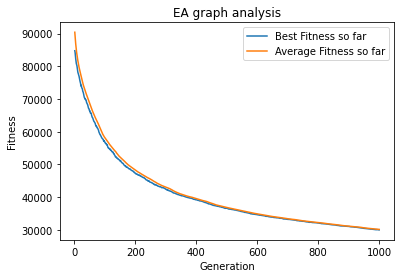

In [7]:
#THIS CELL IF FOR RUNNING TSP PROBLEM SET
file_ = 'qa194.tsp'
population_size = 130
offspring_size = 100
generations = 1000
mutation_rate = 0.5
iterations = 10
parent_ss = "Random"
survivor_ss = "Truncation"
TSP_qt = TSP(file_, population_size, offspring_size, generations, mutation_rate, iterations, parent_ss, survivor_ss)
TSP_qt.run_algo()

[]
1
2
3
4
5
6
7
8
9
10
Best fitness so far = 1023.2
Best Average fitness so far = 1023.2


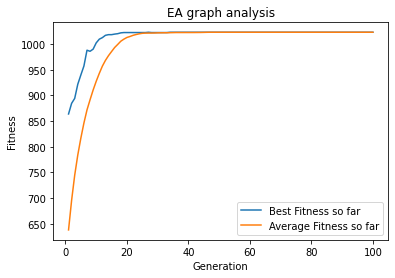

In [37]:
#THIS CELL IS FOR RUNNING KNAPSACK PROBLEM SET
file_ = 'f2_l-d_kp_20_878.txt'
population_size = 130
offspring_size = 100
generations = 100
mutation_rate = 0.5
iterations = 10
parent_ss = "Random"
survivor_ss = "Truncation"
Knapsack_qt = Knapsack(file_, population_size, offspring_size, generations, mutation_rate, iterations, parent_ss, survivor_ss)
Knapsack_qt.run_algo()